# NY Motor Vehicle Collisions – Exploratory Data Analysis  
In this notebook, we analyze New York’s Vehicular crash data available at https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95


The data contains information from all police reported motor vehicle collisions in NYC. The information for this dataset is collated from the police report, called MV104-AN, which is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage.

Data is available from 2012-07-01 onwards, however for this analysis, we will limit ourselves to the period up to 2023-08-15, which is when the data was downloaded.

We find that this data contains over 2 million observations, which allows us to explore several aspects of vehicle crashes in NY's boroughs.

The data dictionary for the data is also available at the URL above.

First, we perform unstructured exploration of the data, and then try to answer the following questions:

- We look for which borough has had the maximum number of crashes reported since 2012.

- We relate the number of crashes to to the borough's population to find out which borough has the maximum number of crashes for every 100,000 people. Even though the data does not have this information, we can combine the crash data with the population estimates for the boroughs also available from the City of New York's website (https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9)

| Borough | Population |
| --- | --- |
| Bronx | 1446788 |
| Brooklyn | 2648452 |
| Manhattan | 1638281 |
| Queens | 2330295 |
| Staten Island | 487155 |  

  
- We look for the leading cause of crashes

- We also look for the top-3 causes of crashes, and try to calculate what proportion of all crashes are caused by these top-3 causes.

- We then look to some of the more serious implications of crashes by examining how many accidents involved at least one fatality.

- We then compute, on average, out of every 1000 accidents, how many have resulted in at least one person dead.

- We also look for missing data and try to compute the proportion of accidents in the data that do not have a Borough code.

- The fields 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2' represent the first two vehicles involved in the accident.  We look for which combinations of vehicles have the most number of accidents.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import phik
from IPython.display import Markdown as md

In [2]:
df = pd.read_pickle("shared/Motor_Vehicle_Collisions_-_Crashes.pkl")
df

,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018240,2023-07-03 18:05:00,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2018241,2023-07-22 21:39:00,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,1.0,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2018242,2023-07-02 17:55:00,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2018243,2023-07-22 13:15:00,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,1.0,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


***
### Show some exploratory data analysis here
***

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018245 entries, 0 to 2018244
Data columns (total 28 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE_CRASH TIME          datetime64[ns]
 1   BOROUGH                        object        
 2   ZIP CODE                       object        
 3   LATITUDE                       float64       
 4   LONGITUDE                      float64       
 5   LOCATION                       object        
 6   ON STREET NAME                 object        
 7   CROSS STREET NAME              object        
 8   OFF STREET NAME                object        
 9   NUMBER OF PERSONS INJURED      float64       
 10  NUMBER OF PERSONS KILLED       float64       
 11  NUMBER OF PEDESTRIANS INJURED  int64         
 12  NUMBER OF PEDESTRIANS KILLED   int64         
 13  NUMBER OF CYCLIST INJURED      int64         
 14  NUMBER OF CYCLIST KILLED       int64         
 15  NUMBER OF MOTOR

In [266]:
df.describe()

,CRASH DATE_CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,2018245,1.788560e+06,1.788560e+06,2.018227e+06,2.018214e+06,2.018245e+06,2.018245e+06,2.018245e+06,2.018245e+06,2.018245e+06,2.018245e+06,2.018245e+06
mean,2017-05-14 17:39:03.899198976,4.062776e+01,-7.375228e+01,3.024249e-01,1.446328e-03,5.518507e-02,7.253827e-04,2.612468e-02,1.119785e-04,2.179889e-01,5.896212e-04,3.116455e+06
min,2012-07-01 00:05:00,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,2014-12-19 18:00:00,4.066792e+01,-7.397493e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.140681e+06
50%,2017-03-29 21:15:00,4.072102e+01,-7.392732e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.645346e+06
75%,2019-06-10 18:30:00,4.076956e+01,-7.386665e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.150156e+06
max,2023-08-15 23:59:00,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.655026e+06
std,NaN,1.980901e+00,3.727568e+00,6.937633e-01,4.007201e-02,2.412867e-01,2.741556e-02,1.614267e-01,1.062812e-02,6.549700e-01,2.648117e-02,1.503997e+06


In [272]:
df.shape

(2018245, 28)

In [ ]:
#There are 2018245 records, 28 features.

In [268]:
df.columns

Index(['CRASH DATE_CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

In [269]:
df.isna().sum()

CRASH DATE_CRASH TIME                  0
BOROUGH                           627854
ZIP CODE                          628092
LATITUDE                          229685
LONGITUDE                         229685
LOCATION                          229685
ON STREET NAME                    424807
CROSS STREET NAME                 755532
OFF STREET NAME                  1685810
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6348
CONTRIBUTING FACTOR VEHICLE 2     307909
CONTRIBUTING FACTOR VEHICLE 3    1875114
CONTRIBUTING FACTOR VEHICLE 4    1986122
CONTRIBUTING FACTOR VEHICLE 5    2009575
COLLISION_ID                           0
VEHICLE TYPE CODE 1                12677
VEHICLE TYPE COD

In [274]:
df.median(numeric_only=True)

LATITUDE                         4.072102e+01
LONGITUDE                       -7.392732e+01
NUMBER OF PERSONS INJURED        0.000000e+00
NUMBER OF PERSONS KILLED         0.000000e+00
NUMBER OF PEDESTRIANS INJURED    0.000000e+00
NUMBER OF PEDESTRIANS KILLED     0.000000e+00
NUMBER OF CYCLIST INJURED        0.000000e+00
NUMBER OF CYCLIST KILLED         0.000000e+00
NUMBER OF MOTORIST INJURED       0.000000e+00
NUMBER OF MOTORIST KILLED        0.000000e+00
COLLISION_ID                     3.645346e+06
dtype: float64

In [275]:
df.mode()

,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2015-01-18 08:00:00,BROOKLYN,11207.0,0.0,0.0,"(0.0, 0.0)",BROADWAY,3 AVENUE,772 EDGEWATER ROAD,0.0,...,Unspecified,Unspecified,Unspecified,Unspecified,22,Sedan,Sedan,Sedan,Sedan,Sedan
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018240,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4655016,NaN,NaN,NaN,NaN,NaN
2018241,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4655019,NaN,NaN,NaN,NaN,NaN
2018242,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4655021,NaN,NaN,NaN,NaN,NaN
2018243,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4655023,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Distributions of numerical variables

array([[<Axes: title={'center': 'CRASH DATE_CRASH TIME'}>,
        <Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>],
       [<Axes: title={'center': 'NUMBER OF PERSONS INJURED'}>,
        <Axes: title={'center': 'NUMBER OF PERSONS KILLED'}>,
        <Axes: title={'center': 'NUMBER OF PEDESTRIANS INJURED'}>],
       [<Axes: title={'center': 'NUMBER OF PEDESTRIANS KILLED'}>,
        <Axes: title={'center': 'NUMBER OF CYCLIST INJURED'}>,
        <Axes: title={'center': 'NUMBER OF CYCLIST KILLED'}>],
       [<Axes: title={'center': 'NUMBER OF MOTORIST INJURED'}>,
        <Axes: title={'center': 'NUMBER OF MOTORIST KILLED'}>,
        <Axes: title={'center': 'COLLISION_ID'}>]], dtype=object)

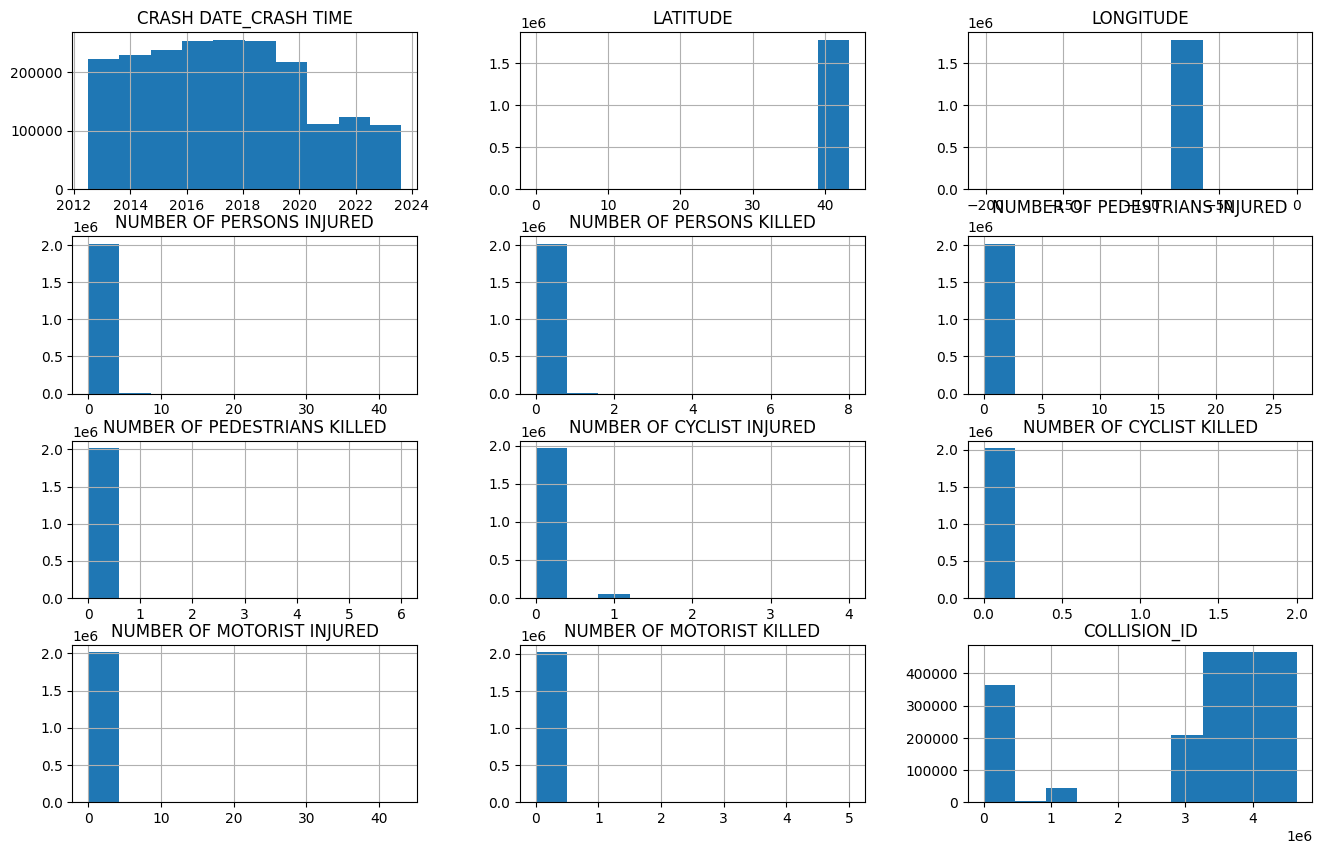

In [279]:
df.hist(figsize=(16,10))

In [ ]:
#Correlations between the different columns

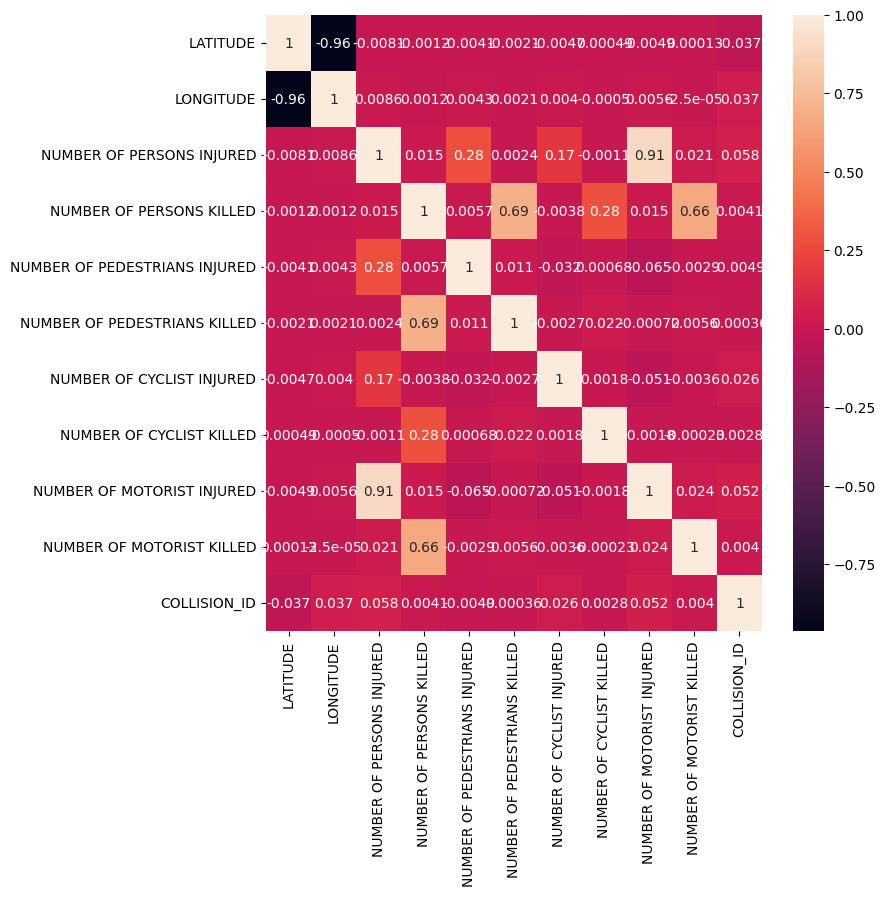

In [280]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(numeric_only=True), annot=True);
plt.show()

In [281]:
import ydata_profiling
profile = ydata_profiling.ProfileReport(df, title = 'My EDA', minimal=True).to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Borough with the maximum number of crashes reported since 2012

In [151]:
df.groupby('BOROUGH').agg('count').iloc[:,0].sort_values(ascending = False)

BOROUGH
BROOKLYN         441026
QUEENS           372457
MANHATTAN        313266
BRONX            205345
STATEN ISLAND     58297
Name: CRASH DATE_CRASH TIME, dtype: int64

In [ ]:
#Brooklyn has the highest total number of crashes reported since 2012.

## Borough with the maximum number of crashes adjusted for population

In [ ]:
#Population estimates

In [160]:
df_population = pd.DataFrame({
    'BOROUGH':['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND'],
    'Population':[1446788,2648452,1638281,2330295,487155]})
df_population

,BOROUGH,Population
0,BRONX,1446788
1,BROOKLYN,2648452
2,MANHATTAN,1638281
3,QUEENS,2330295
4,STATEN ISLAND,487155


In [161]:
df_1 = df_population.merge(df.groupby('BOROUGH').agg('count'),how = 'inner',left_on='BOROUGH',right_index = True)

In [162]:
df_1['CRASHES_PER_100K'] = df_1['CRASH DATE_CRASH TIME']/df_1['Population']*100000

In [163]:
df_1[['BOROUGH','CRASHES_PER_100K']].sort_values(['CRASHES_PER_100K'], ascending = False)

,BOROUGH,CRASHES_PER_100K
2,MANHATTAN,19121.628097
1,BROOKLYN,16652.217975
3,QUEENS,15983.255339
0,BRONX,14193.164444
4,STATEN ISLAND,11966.827806


In [ ]:
#Manhattan has the most crashes for every 100,000 people with 19122 crashes per 100k population.

## Analyzing the leading cause of crashes

In [ ]:
#For a large proportion of the crashes, the 'contributing factor vehicle 1' is a missing value, indicated as 'Unspecified' in the data.

#Remove all rows where the contributing factor vehicle 1 is not known, leaving only the crashes where only this information is available.

In [179]:
df_1 = df.drop(df[df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Unspecified'].index)

In [180]:
df_1['CONTRIBUTING FACTOR VEHICLE 1']

0            Aggressive Driving/Road Rage
1                       Pavement Slippery
2                   Following Too Closely
4                                     NaN
6                     Passing Too Closely
                        ...              
2018238             Following Too Closely
2018239                  Backing Unsafely
2018240                Turning Improperly
2018242    Driver Inattention/Distraction
2018243    Driver Inattention/Distraction
Name: CONTRIBUTING FACTOR VEHICLE 1, Length: 1325509, dtype: object

In [198]:
df_2 = df_1.groupby('CONTRIBUTING FACTOR VEHICLE 1').agg('count').sort_values('CRASH DATE_CRASH TIME',ascending = False)

In [200]:
df_2['PROPOTION_ACCIDENT'] = (df_2['CRASH DATE_CRASH TIME'])/df_2['CRASH DATE_CRASH TIME'].sum()

In [203]:
df_2['PROPOTION_ACCIDENT'].head(1)

CONTRIBUTING FACTOR VEHICLE 1
Driver Inattention/Distraction    0.30418
Name: PROPOTION_ACCIDENT, dtype: float64

In [ ]:
#The leading cause of crashes is Driver Inattention/Distraction and the proportion is 30.4%.

## Top 3 causes of crashes 

In [204]:
df_2['PROPOTION_ACCIDENT'].head(3).sum()

0.47598056643578757

In [ ]:
#The top 3 causes of crashes (ignoring 'Unspecified') account for 47.6% of total crashes.

## Analyzing fatalities

In [237]:
df_fatality = df.groupby('NUMBER OF PERSONS KILLED').agg('count').drop(0,axis = 0)

In [239]:
df_fatality['CRASH DATE_CRASH TIME'].sum()

2804

In [ ]:
#There 2804 accidents involved at least one fatality since 2012.

## Likelihood of fatal accidents
#### On average, out of every 1000 accidents, how many have resulted in at least one person dead?

In [264]:
result_death_1000 = df_fatality['CRASH DATE_CRASH TIME'].sum()/df['CRASH DATE_CRASH TIME'].count()*1000
result_death_1000

1.3893258747079764

In [ ]:
#On average, for every 1000 accidents, 1.389 resulted in at least one person dead.

## Missing data
#### What proportion of accidents in the data do not have a Borough code?

In [251]:
df['BOROUGH'].isna().sum()/df['BOROUGH'].isna().count()

0.3110890897784957

In [ ]:
#31.3% of the accidents in the data do not have a Borough code.

## Which combinations of vehicles have the most number of accidents

In [263]:
df.groupby(['VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2']).agg('count').sort_values('CRASH DATE_CRASH TIME',ascending = False)

CRASH DATE_CRASH TIME  \
VEHICLE TYPE CODE 1                 VEHICLE TYPE CODE 2                                          
Sedan                               Sedan                                               197944   
PASSENGER VEHICLE                   PASSENGER VEHICLE                                   193260   
Station Wagon/Sport Utility Vehicle Station Wagon/Sport Utility Vehicle                 133780   
Sedan                               Station Wagon/Sport Utility Vehicle                 123915   
Station Wagon/Sport Utility Vehicle Sedan                                               123812   
...                                                                                        ...   
Pick-up Truck                       UNKNOWN                                                  1   
                                    UNK L                                                    1   
                                    U HAU                                                    1   
                                    Truck                                                    1   
�MBU                                Taxi                                                     1   

                                                                         BOROUGH  \
VEHICLE TYPE CODE 1                 VEHICLE TYPE CODE 2                            
Sedan                               Sedan                                 123434   
PASSENGER VEHICLE                   PASSENGER VEHICLE                     139729   
Station Wagon/Sport Utility Vehicle Station Wagon/Sport Utility Vehicle    80485   
Sedan                               Station Wagon/Sport Utility Vehicle    75573   
Station Wagon/Sport Utility Vehicle Sedan                                  74227   
...                                                                          ...   
Pick-up Truck                       UNKNOWN                                    0   
                                    UNK L                                      1   
                                    U HAU                                      1   
                                    Truck                                      0   
�MBU                                Taxi                                       1   

                                                                         ZIP CODE  \
VEHICLE TYPE CODE 1                 VEHICLE TYPE CODE 2                             
Sedan                               Sedan                                  123388   
PASSENGER VEHICLE                   PASSENGER VEHICLE                      139718   
Station Wagon/Sport Utility Vehicle Station Wagon/Sport Utility Vehicle     80451   
Sedan                               Station Wagon/Sport Utility Vehicle     75547   
Station Wagon/Sport Utility Vehicle Sedan                                   74206   
...                                                                           ...   
Pick-up Truck                       UNKNOWN                                     0   
                                    UNK L                                       1   
                                    U HAU                                       1   
                                    Truck                                       0   
�MBU                                Taxi                                        1   

                                                                         LATITUDE  \
VEHICLE TYPE CODE 1                 VEHICLE TYPE CODE 2                             
Sedan                               Sedan                                  182018   
PASSENGER VEHICLE                   PASSENGER VEHICLE                      158933   
Station Wagon/Sport Utility Vehicle Station Wagon/Sport Utility Vehicle    121485   
Sedan                               Station Wagon/Sport Utility Vehicle    114718   
Station Wagon/Sport Utility Vehicle Sedan                                  114002   
... 

In [ ]:
#The fields 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2' represent the first two vehicles involved in the accident. The combination of Sedan and Sedan have the most number of accidents, which is 197944.

***  
## Finished